In [1]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import os


In [2]:
folder_res = "C:/Users/andre/Documents/Github/GroupA_DataMining/resources/data"
folder_prep = "C:/Users/andre/Documents/Github/GroupA_DataMining/resources/data-prep"

cwd = os.getcwd()

In [3]:
def pca(folder_path):
    all_datasets = os.listdir(folder_path)
    for filename in all_datasets:
        if filename.endswith(".csv"): 
            df = pd.read_csv(f"{folder_path}/{filename}")
            print(filename)
            
            cov = df.cov()
            cov_num = cov.apply(pd.to_numeric)
            
            eigenvalues = np.linalg.eigvals(cov_num)
            exp_var_rat = eigenvalues / np.sum(eigenvalues)
            cum_sum_eigenvalues = np.cumsum(exp_var_rat)
            
            
            print('explained variance ratio: %s' % str(exp_var_rat))
            print('cummulative sum of eigenvalues: %s' % str(exp_var_rat))
            
            
            plt.bar(range(0,len(exp_var_rat)), exp_var_rat, alpha=0.5, align='center', label='Individual explained variance')
            plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
            plt.xticks(np.arange(0, len(cum_sum_eigenvalues), 1))
            plt.yticks(np.arange(0, 1.05, 0.05))
            plt.grid(visible=True, which='both', axis='y')
            plt.ylabel('Explained variance ratio')
            plt.xlabel('Principal component index')
            plt.legend(loc='center')
            plt.tight_layout()
            plt.show()

In [41]:
def pca2(folder_path):
    pdf_file = pdf.PdfPages('pca.pdf')
    all_datasets = os.listdir(folder_path)
    for filename in all_datasets:
        if filename.endswith(".csv"): 
            df = pd.read_csv(f"{folder_path}/{filename}")
            print(filename)
            
            pca = PCA()
            df_pca = pca.fit_transform(df)
            exp_var = pca.explained_variance_ratio_
            cum_sum_eigenvalues = np.cumsum(exp_var)
            
            plt.rcParams['figure.dpi'] = 100
            plt.rcParams['savefig.dpi'] = 600

            plt.figure().set_figwidth(max(3 + (len(cum_sum_eigenvalues)-8)/5, 6))
            plt.bar(range(0,len(exp_var)), exp_var, alpha=0.5, align='center', label='Individual explained variance')
            plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
            plt.ylabel('Explained variance ratio')
            plt.xlabel('Principal component index')
            plt.xticks(np.arange(0, len(cum_sum_eigenvalues), 1))
            plt.yticks(np.arange(0, 1.05, 0.05))
            plt.legend(loc='best')
            plt.tight_layout()
            # plt.show()
            pdf_file.savefig(plt.gcf(), bbox_inches='tight')   
    pdf_file.close()
            

EARTH-prep.csv
EINSTEIN-prep.csv
FIBONACCI-prep.csv
HITCHHIKER-prep.csv
HOBBIT-prep.csv
LOREM-prep.csv
NKS-prep.csv
ROSETTA-prep.csv
SALT-prep.csv
SUN-prep.csv
SYMMETRIC-prep.csv
x0-prep.csv
x1-prep.csv
x2-prep.csv


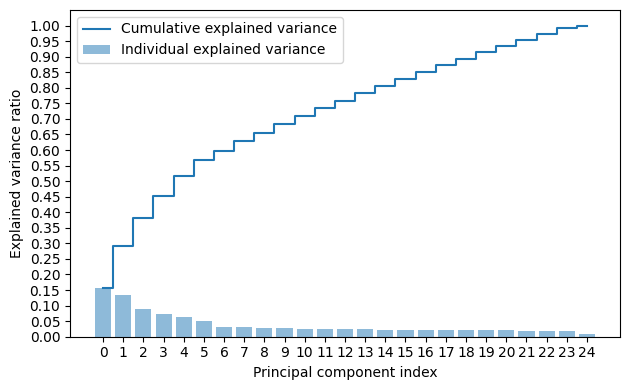

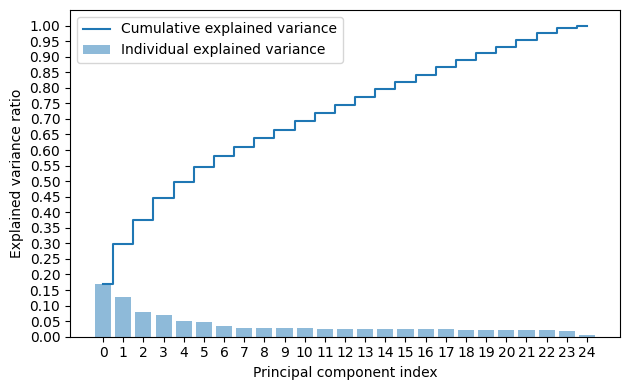

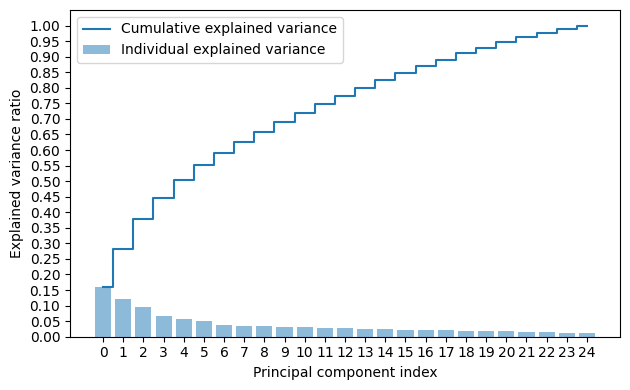

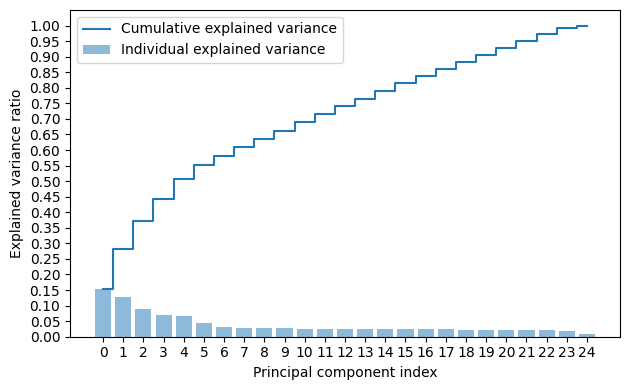

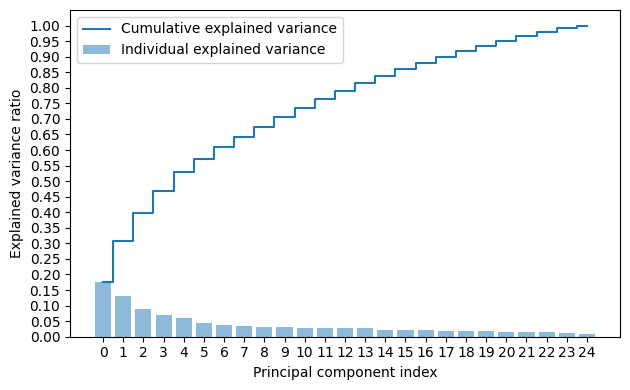

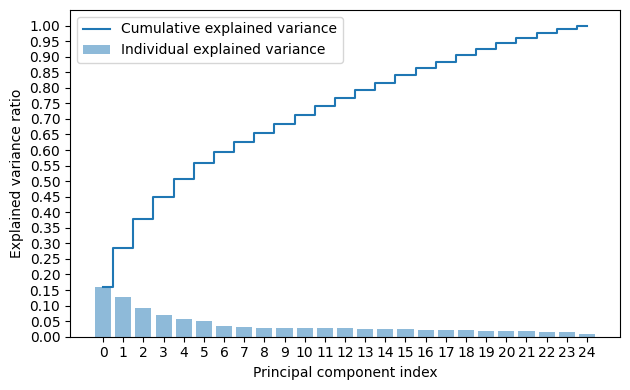

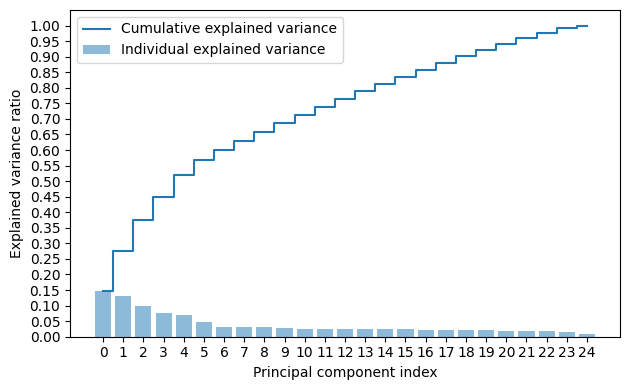

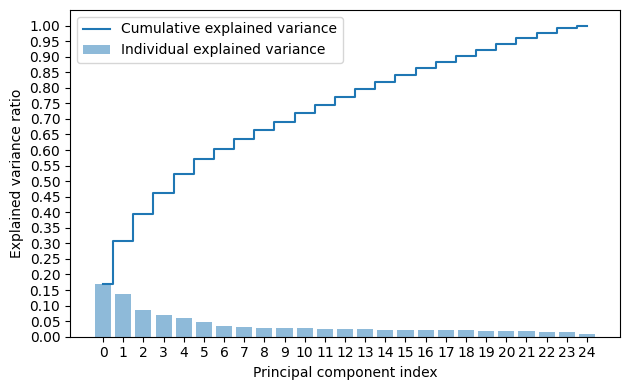

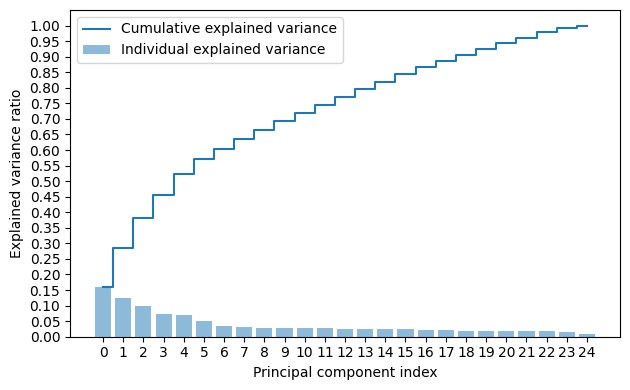

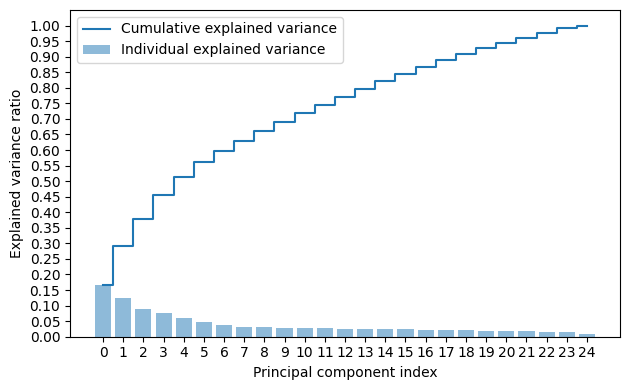

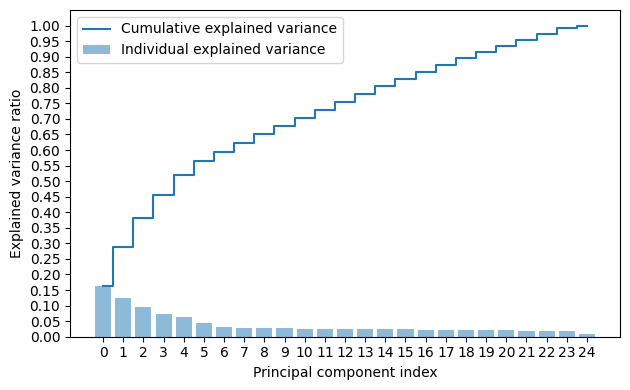

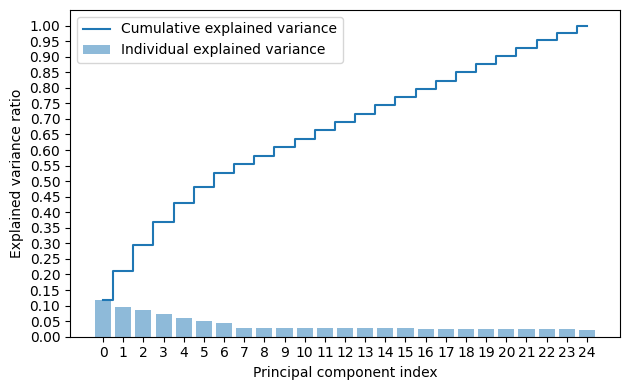

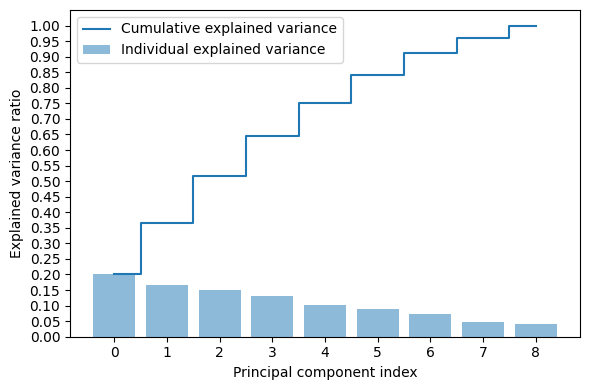

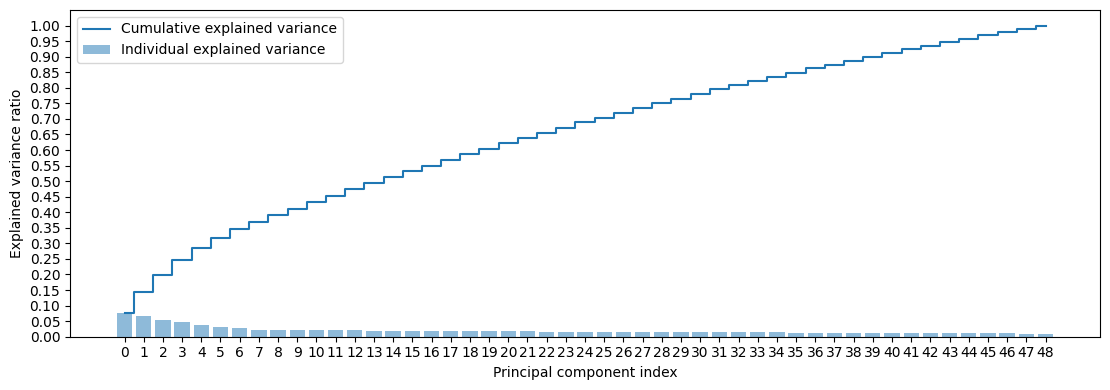

In [42]:
pca2(folder_prep)